Crea una regresión lineal con los demás inputs numericos

'housing_median_age', 'total_rooms',
'total_bedrooms', 'population', 'households'

- Realiza un analisis bivariado de cada uno de estos
- Escribe la ecuación del modelo 
- Obtener R2 y mean squared error
- Grafica las predicciones 

Responde la pregunta: ¿Cuál es el mejor modelo de estos? ¿Por qué?

In [98]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [99]:
df= pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [160]:
target= 'median_house_value'
y= df[target]

# ANALISIS BIVARIADO

#### Housing Median Age

In [100]:
del df['ocean_proximity']

In [101]:
df = df[df.median_house_value != df.median_house_value.max()]

In [102]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [103]:
df['median_house_value_bin']=pd.qcut(df['median_house_value'],q=5, labels=False)+1

In [104]:
df.groupby('median_house_value_bin').mean()[['median_house_value']]

,median_house_value
median_house_value_bin,
1,78359.288325
2,129366.785260
3,174402.565405
4,232343.754770
5,348230.671414


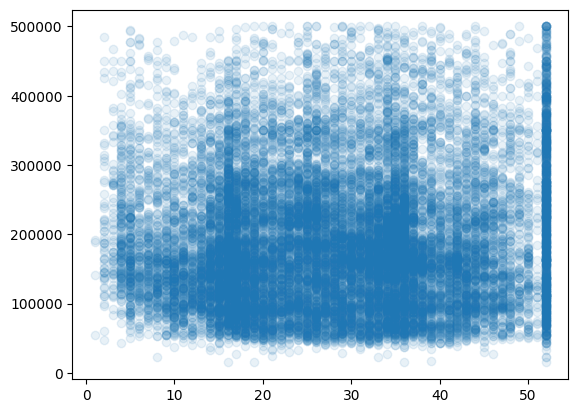

In [105]:
plt.scatter(df.housing_median_age, df.median_house_value, alpha=0.1)

In [106]:
df['housing_median_age_bin']=pd.qcut(df['housing_median_age'],q=10,labels=False)+1

In [107]:
grouped_age= df.groupby('housing_median_age_bin').mean()


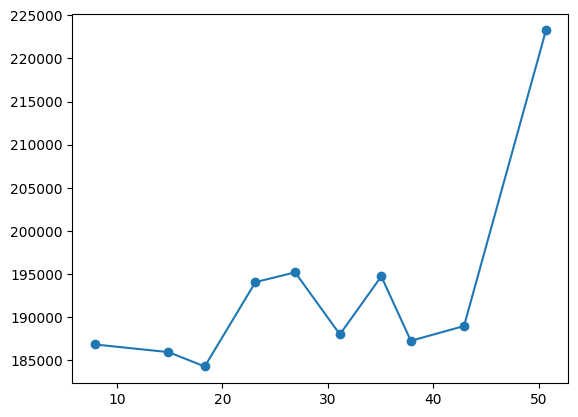

In [108]:
plt.plot(grouped_age.housing_median_age.values, grouped_age.median_house_value.values, marker="o")

#### Total Rooms

In [109]:
df['total_rooms_bin']=pd.qcut(df['total_rooms'],q=10,labels=False)+1

In [110]:
grouped_rooms= df.groupby('total_rooms_bin').mean()


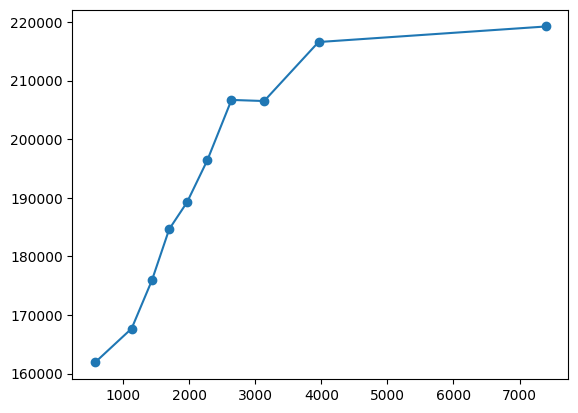

In [111]:
plt.plot(grouped_rooms.total_rooms.values, grouped_rooms.median_house_value.values, marker="o")

#### Bedrooms

In [112]:
df['total_bedrooms_bin']=pd.qcut(df['total_bedrooms'],q=10,labels=False)+1

In [113]:
grouped_bedrooms= df.groupby('total_bedrooms_bin').mean()

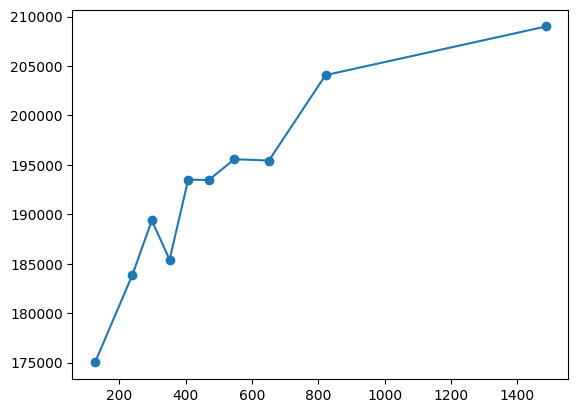

In [114]:
plt.plot(grouped_bedrooms.total_bedrooms.values, grouped_bedrooms.median_house_value.values, marker="o")

#### Population

In [115]:
df['population_bin']=pd.qcut(df['population'],q=10,labels=False)+1

In [116]:
grouped_population= df.groupby('population_bin').mean()

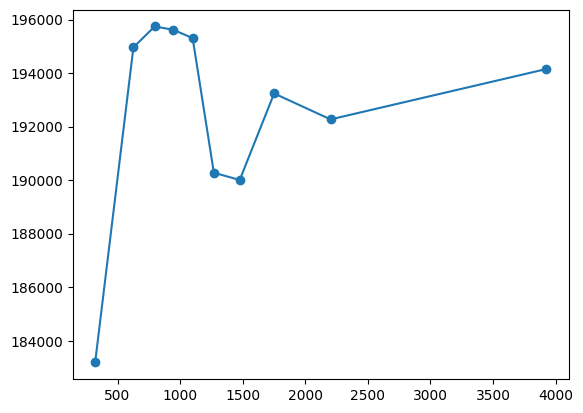

In [117]:
plt.plot(grouped_population.population.values, grouped_population.median_house_value.values, marker="o")

In [118]:
df['households_bin']=pd.qcut(df['households'],q=10,labels=False)+1

In [119]:
grouped_households= df.groupby('households_bin').mean()

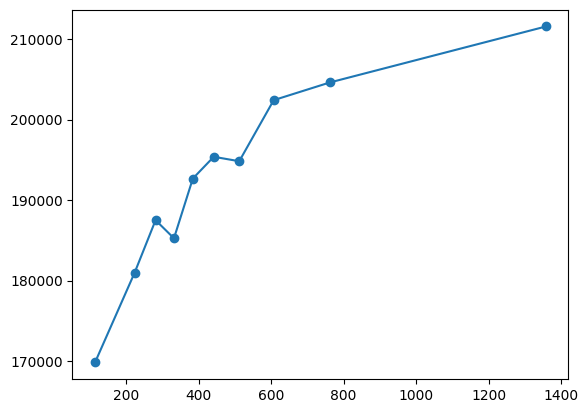

In [120]:
plt.plot(grouped_households.households.values, grouped_households.median_house_value.values, marker="o")

# Ecuación del Modelo

 #### Population

In [173]:
# Crea una regreson lineal
model0= linear_model.LinearRegression()
X= df[['population']]
Y= df['median_house_value']

model0.fit(X,Y)

LinearRegression()

In [174]:
model0.fit(X, y)
predictions_households = model0.predict(X)
print('r2 :',r2_score(y_pred=predictions_households, y_true=y))

r2 : 0.00014314747840926678


In [175]:
model0.intercept_


191005.0921058971

In [176]:
model0.coef_

array([1.02222129])

In [177]:
precio_total_rooms= 191005.09 +  1.02222129 * X

In [178]:
predicciones1= model0.predict(X)
predicciones1


array([191334.24736278, 193459.44543437, 191512.11386805, ...,
       192034.46894962, 191762.55808524, 192422.91304158])

In [179]:
df['predicciones2']= predicciones1

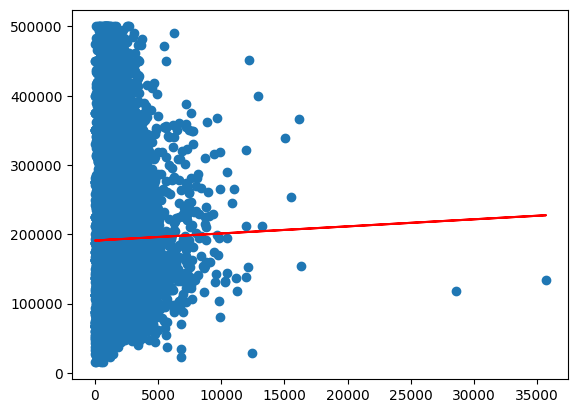

In [180]:
plt.scatter(df['population'], df['median_house_value'])
plt.plot(df['population'], predicciones1, color='red')

In [194]:
calibracion1 = pd.DataFrame({
    'predicciones1': predicciones1,
    'real': y
})

In [195]:
calibracion1['bins'] = pd.qcut (calibracion1['predicciones1'], q= 10, labels= False)+1

In [196]:
grouped_calibracion= calibracion1.groupby('bins').mean()

In [197]:
grouped_calibracion['error']= (grouped_calibracion.predicciones1 - grouped_calibracion.real ) / grouped_calibracion.predicciones1

In [198]:
grouped_calibracion

,predicciones1,real,error
bins,,,
1,191333.603088,183186.235145,0.042582
2,191646.183720,194962.112240,-0.017302
3,191819.432506,195742.791878,-0.020453
4,191971.268242,195620.000000,-0.019007
5,192129.616245,195308.863984,-0.016547
6,192303.102141,190276.860347,0.010537
7,192513.961522,190006.415479,0.013025
8,192794.914374,193240.731336,-0.002312
9,193255.517223,192270.106762,0.005099


#### Total Rooms

In [128]:
# Crea una regreson lineal
model= linear_model.LinearRegression()
X1= df[['total_rooms']]
Y= df['median_house_value']

model.fit(X1,Y)

LinearRegression()

In [171]:
model.fit(X1, y)
predictions_total_rooms = model.predict(X1)
print('r2 :',r2_score(y_pred=predictions_total_rooms, y_true=y))

r2 : 0.020488694351853853


In [129]:
model_intercept1 = model.intercept_
model_intercept1

175680.60158723383

In [130]:
model_coef= model.coef_
model_coef

array([6.411769])

$$Precio  = 175680.60 + 6.411769 * ingreso$$

In [131]:
precio_total_rooms= model_intercept1 + 6.411769 * X1
precio_total_rooms

,total_rooms
0,181322.958307
1,221197.749718
2,185086.666710
3,183849.195293
4,186112.549750
...,...
20635,186356.196972
20636,180149.604580
20637,190132.728913
20638,187606.491927


In [139]:
predicciones= model.predict(X1)
predicciones

array([181322.95831066, 221197.74974585, 185086.66671594, ...,
       190132.728922  , 187606.49193447, 193537.37826307])

In [60]:
df['predicciones']= predicciones

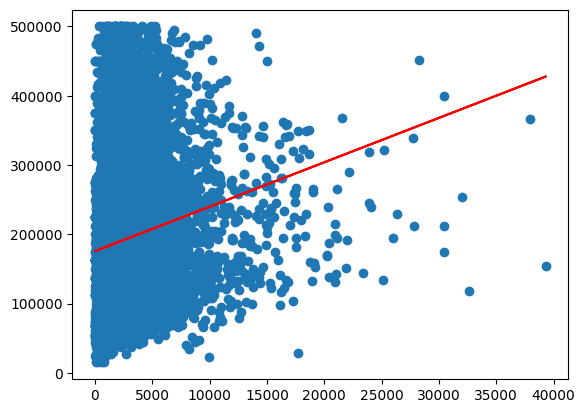

In [172]:
# Visualiza las predicciones del modelo 
plt.scatter(df['total_rooms'], df['median_house_value'])
plt.plot(df['total_rooms'], predicciones, color='red')

In [207]:
calibracion0 = pd.DataFrame({
    'predicciones': predicciones,
    'real': y
})

In [208]:
calibracion0['bins'] = pd.qcut (calibracion0['predicciones'], q= 10, labels= False)+1

In [209]:
grouped_calibracion= calibracion0.groupby('bins').mean()

In [210]:
grouped_calibracion['error']= (grouped_calibracion.predicciones - grouped_calibracion.real ) / grouped_calibracion.predicciones

In [211]:
grouped_calibracion

,predicciones,real,error
bins,,,
1,179355.369085,161888.723210,0.097386
2,182909.191498,167679.918658,0.083261
3,184877.527120,175906.348400,0.048525
4,186555.441233,184638.809766,0.010274
5,188290.980057,189249.008643,-0.005088
6,190253.210914,196394.464195,-0.032279
7,192600.914639,206707.063008,-0.073240
8,195770.566409,206516.488550,-0.054890
9,201050.367778,216587.747839,-0.077281


### Households

In [79]:
# Crea una regreson lineal
model3= linear_model.LinearRegression()
X3= df[['households']]
Y= df['median_house_value']

model3.fit(X3,Y)

LinearRegression()

In [170]:

model3.fit(X3, y)
predictions_households = model3.predict(X3)
print('r2 :',r2_score(y_pred=predictions_households, y_true=y))


r2 : 0.009004884338978392


In [88]:
model_intercept3= model3.intercept_
model_intercept3

180352.83033455774

In [89]:
model_coef3= model3.coef_
model_coef3

array([24.19279495])

$$Precio  = 180352.8303 + 24.1927 * ingreso$$

In [ ]:
precio_households= model_intercept3 + 24.1927 * X3
precio_households

,households
0,183401.110535
1,207884.122935
2,184634.938235
3,185651.031635
4,186618.739635
...,...
20635,188336.421335
20636,183110.798135
20637,190828.269435
20638,188796.082635


In [91]:
predicciones3= model3.predict(X3)
predicciones3

array([183401.12249796, 207884.23098498, 184634.95504029, ...,
       190828.31054689, 188796.11577129, 193175.01165681])

In [92]:
df['predicciones3']= predicciones3

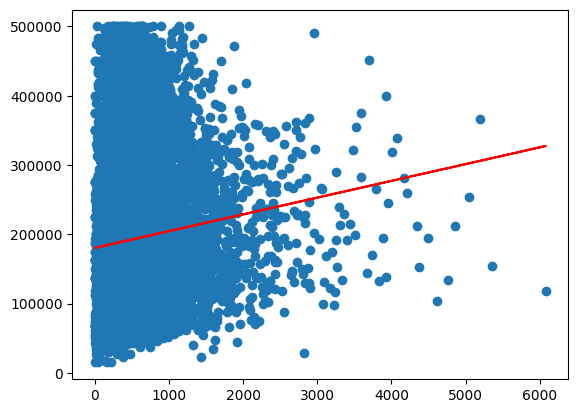

In [96]:
plt.scatter(df['households'], df['median_house_value'])
plt.plot(df['households'], predicciones, color='red')

In [201]:
calibracion2 = pd.DataFrame({
    'predicciones3': predicciones3,
    'real': y
})

In [202]:
calibracion2['bins'] = pd.qcut (calibracion2['predicciones3'], q= 10, labels= False)+1

In [203]:
grouped_calibracion= calibracion2.groupby('bins').mean()

In [205]:
grouped_calibracion['error']= (grouped_calibracion.predicciones3 - grouped_calibracion.real ) / grouped_calibracion.predicciones3
grouped_calibracion

,predicciones3,real,error
bins,,,
1,183123.565827,169822.445399,0.072635
2,185767.863080,180986.194091,0.025740
3,187162.467406,187500.713194,-0.001807
4,188388.767002,185250.075415,0.016661
5,189647.724304,192670.956256,-0.015941
6,191042.295451,195376.342452,-0.022686
7,192743.134214,194822.661871,-0.010789
8,195040.710314,202409.710219,-0.037782
9,198784.095776,204607.430025,-0.029295


### Housing median age

In [161]:
# Crea una regreson lineal
model4= linear_model.LinearRegression()
X4= df[['housing_median_age']]
Y= df['median_house_value']

model4.fit(X4,Y)


LinearRegression()

In [169]:

model4.fit(X4, y)
predictions_age = model4.predict(X4)
print('r2 :',r2_score(y_pred=predictions_age, y_true=y))


r2 : 0.004616870761556036


In [163]:
model_intercept4= model4.intercept_
model_intercept4

177411.7980609347

In [164]:
model_coef4= model4.coef_
model_coef4

array([530.7537496])

$$Precio  = 177411.7980 + 530.7537496 * ingreso$$

In [165]:
precio_housing_median_age= model_intercept4 + 177411.7980 * X4
precio_housing_median_age

,housing_median_age
0,7.451296e+06
1,3.903060e+06
2,9.402825e+06
3,9.402825e+06
4,9.402825e+06
...,...
20635,4.612707e+06
20636,3.370824e+06
20637,3.193412e+06
20638,3.370824e+06


In [166]:
predicciones4 = model4.predict(X4)
predicciones4

array([199172.7017945 , 188557.62680252, 205010.99304009, ...,
       186434.61180412, 186965.36555372, 185903.85805452])

In [167]:
df['predicciones4']= predicciones4

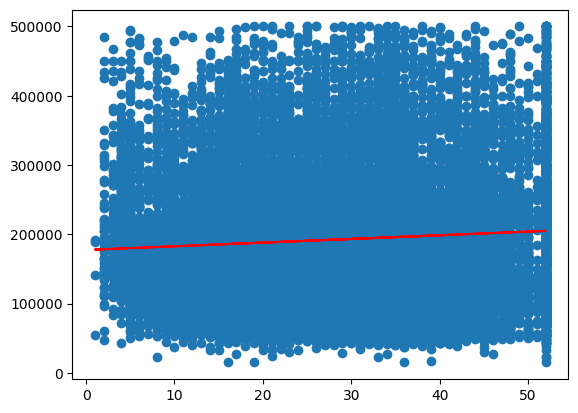

In [168]:
plt.scatter(df['housing_median_age'], df['median_house_value'])
plt.plot(df['housing_median_age'], predicciones4, color='red')

In [184]:
calibracion = pd.DataFrame({
    'predicciones4': predicciones4,
    'real': y
})

In [185]:
calibracion['bins'] = pd.qcut (calibracion['predicciones4'], q= 10, labels= False)+1

In [186]:
grouped_calibracion= calibracion.groupby('bins').mean()

In [188]:
grouped_calibracion['error']= (grouped_calibracion.predicciones4 - grouped_calibracion.real ) / grouped_calibracion.predicciones4

In [191]:
grouped_calibracion

,predicciones4,real,error
bins,,,
1,181611.456662,186838.042936,-0.028779
2,185307.843257,185956.121939,-0.003498
3,187137.237973,184289.005980,0.015220
4,189691.173687,194068.314607,-0.023075
5,191688.299616,195196.883289,-0.018304
6,193943.394289,188006.799674,0.030610
7,196028.807792,194733.716372,0.006607
8,197515.819553,187263.961039,0.051904
9,200193.091014,188975.855513,0.056032


El que mejor se ajusta es el de total_roooms, es el que mayor r2 tiene. En esta tarea se me complicó sacar el de total_bedrooms , por alguna razón me daba error con cualquier cosa que intentara. También el de households tiene un ajuste más cercano a 1 y por lo tanto es bueno. Aunque en las indicaciones nunca se pide que use median_income , sería la que mejor r2 tiene.